# Задача 5.2

In [121]:
import numpy as np
import math as mth
import scipy.optimize as opt
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка данных и разбиение на компоненты

In [122]:
data = load_iris()
comp = [[], [], []]
for i in np.arange(150):
    comp[data.target[i]].append(data.data[i])

## Оценка матожиданий и матриц ковариаций
Я сразу написала функции для любых размерностей, тк это понадибится далее

In [141]:
def expect(sample, k):
    return np.array([sample[:,j].mean() for j in np.arange(k)])

a = [expect(np.array(comp[0]), 4), expect(np.array(comp[1]), 4), expect(np.array(comp[2]), 4)]

In [142]:
def covar(sample, k):
    return np.array([[((sample[:,i] * sample[:,j]).mean() - sample[:,i].mean() * sample[:,j].mean())\
                      for j in np.arange(k)] for i in np.arange(k)]).reshape(k,k)

sigma = [covar(np.array(comp[0]), 4), covar(np.array(comp[1]), 4), covar(np.array(comp[2]), 4)]

### Значение вектора матожиданий и матрицы ковариаций по для всех компонент

#### 1 компонента
Матожидание

In [143]:
print(a[0])

[ 5.006  3.418  1.464  0.244]


Матрица ковариаций

In [125]:
print(sigma[0])

[[ 0.121764  0.098292  0.015816  0.010336]
 [ 0.098292  0.142276  0.011448  0.011208]
 [ 0.015816  0.011448  0.029504  0.005584]
 [ 0.010336  0.011208  0.005584  0.011264]]


#### 2 компонента
Матожидание

In [145]:
print(a[1])

[ 5.936  2.77   4.26   1.326]


Матрица ковариаций

In [126]:
print(sigma[1])

[[ 0.261104  0.08348   0.17924   0.054664]
 [ 0.08348   0.0965    0.081     0.04038 ]
 [ 0.17924   0.081     0.2164    0.07164 ]
 [ 0.054664  0.04038   0.07164   0.038324]]


#### 3 компонента
Матожидание

In [146]:
print(a[2])

[ 6.588  2.974  5.552  2.026]


Матрица ковариаций

In [127]:
print(sigma[2])

[[ 0.396256  0.091888  0.297224  0.048112]
 [ 0.091888  0.101924  0.069952  0.046676]
 [ 0.297224  0.069952  0.298496  0.047848]
 [ 0.048112  0.046676  0.047848  0.073924]]


### Построение графиков плотностей для различных проекций различных компонент смеси

In [175]:
def showdens(pair, com, x1=0, x2=9, y1=-1, y2=6):
    sample = np.array([[comp[com-1][i][pair[0]-1], comp[com-1][i][pair[1]-1]] for i in np.arange(50)])
    X,Y = np.mgrid[0:8:0.01, -1:8:0.01]
    pos = np.empty(X.shape + (2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    plt.figure(figsize = (10, 10))
    plt.contour(X, Y, sps.multivariate_normal.pdf(pos, mean=expect(sample,2),cov=covar(sample,2)), cmap = 'BrBG')
    plt.title(r'Coordinates - $' + str(pair) + r'$, Component # $' + str(com) + r'$')
    plt.scatter(sample[:,0], sample[:,1], alpha=0.2, s=40, label='sample')
    plt.xlim(x1, x2)
    plt.ylim(y1, y2)
    plt.legend()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.show()

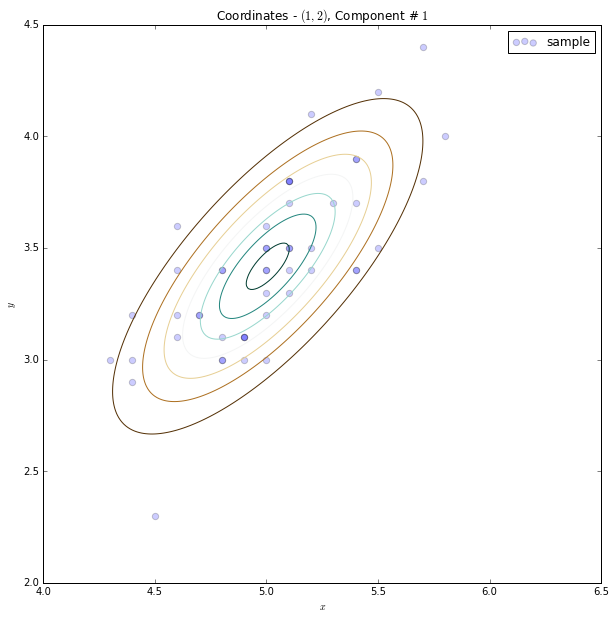

In [166]:
showdens((1, 2), 1, 4, 6.5, 2, 4.5)

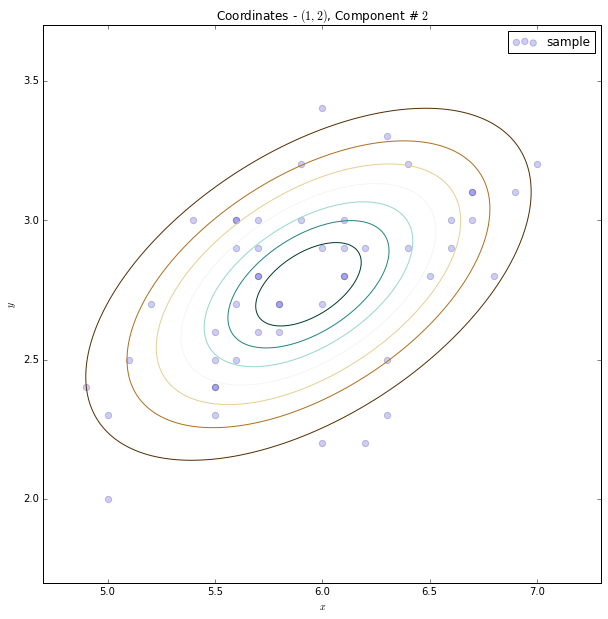

In [168]:
showdens((1, 2), 2, 4.7, 7.3, 1.7, 3.7)

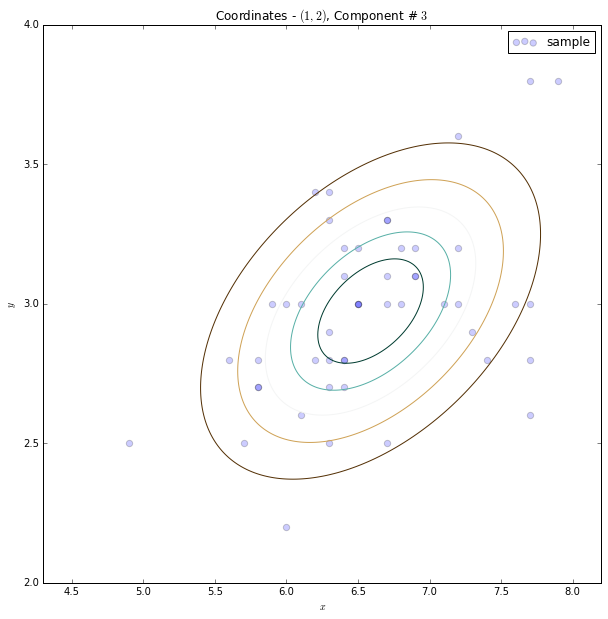

In [169]:
showdens((1, 2), 3, 4.3, 8.2, 2, 4)

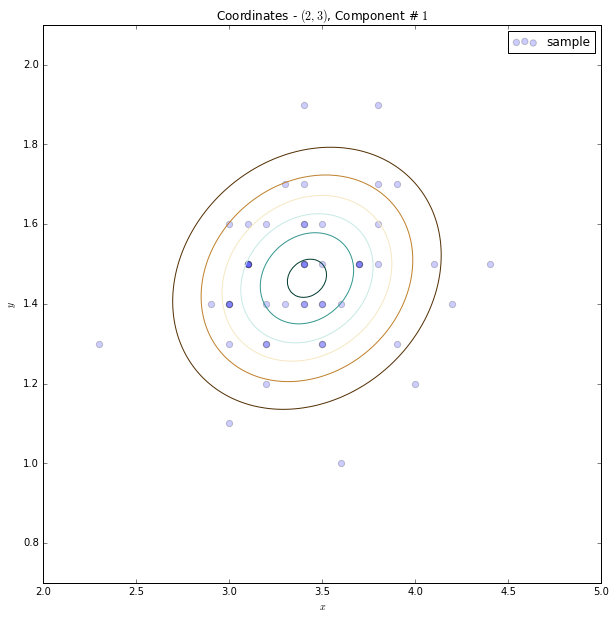

In [170]:
showdens((2, 3), 1, 2, 5, 0.7, 2.1)

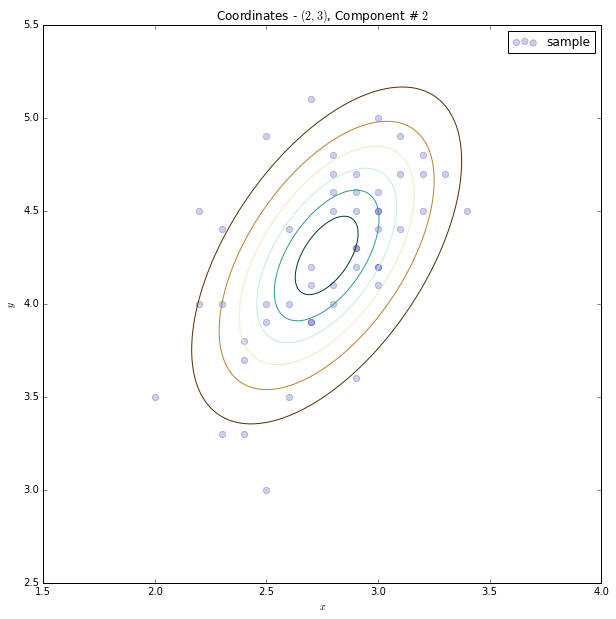

In [155]:
showdens((2, 3), 2, 1.5, 4, 2.5, 5.5)

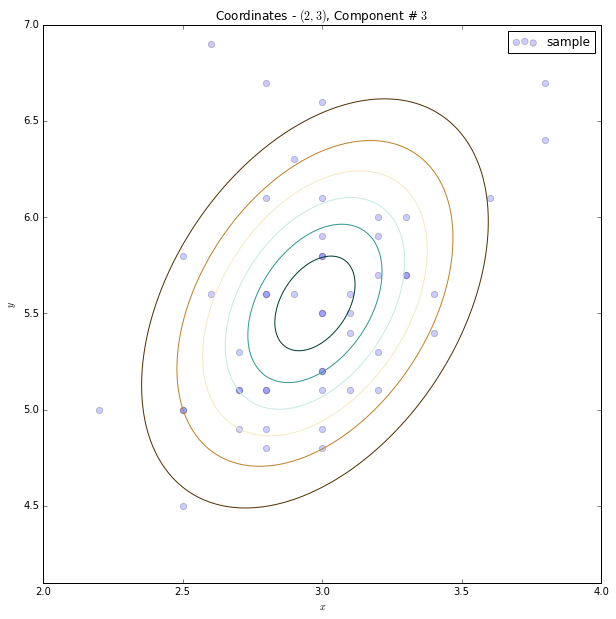

In [176]:
showdens((2, 3), 3, 2, 4, 4.1, 7)

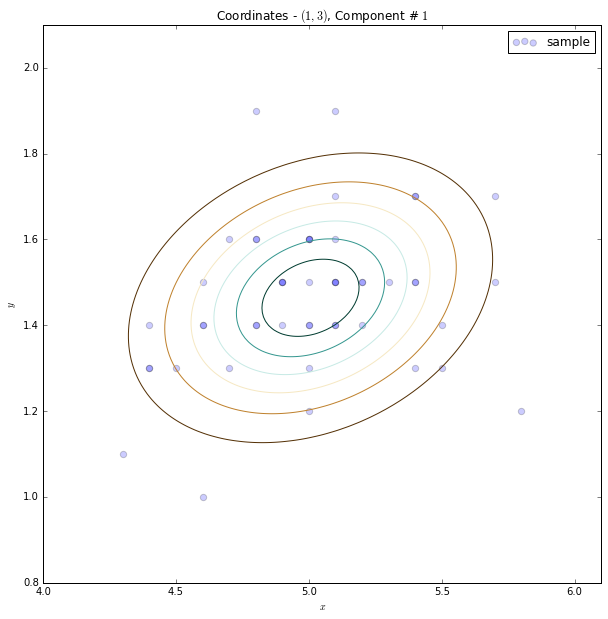

In [177]:
showdens((1, 3), 1, 4, 6.1, 0.8, 2.1)

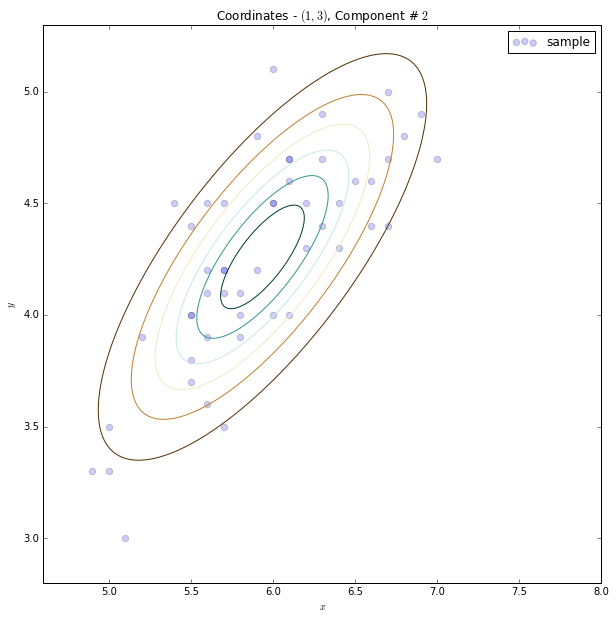

In [178]:
showdens((1, 3), 2, 4.6, 8, 2.8, 5.3)

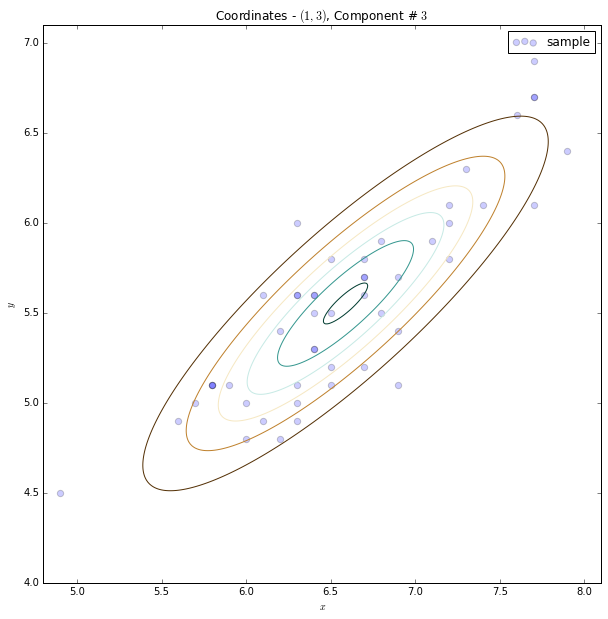

In [181]:
showdens((1, 3), 3, 4.8, 8.1, 4, 7.1)

## Графики условной плотности

In [187]:
def print_cond_density(pair, i):
    K=[1,2,3]
    K.remove(i)
    
    X,Y = np.mgrid[0:8:0.01, -1:6:0.01]
    pos = np.empty(X.shape + (2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    
    sample = [np.array([[x[pair[0]], x[pair[1]]] for x in data.data[50*(k-1):50*k]]) for k in K ]
    exp=[expect(sample[0],2),expect(sample[1],2)]
    cov=[covar(sample[0],2),covar(sample[1],2)] 
    density=(mlab.bivariate_normal(X, Y, sigmax=numpy.sqrt(cov[0][0][0]), sigmay=numpy.sqrt(cov[0][1][1]),
                               mux=exp[0][0], muy=exp[0][1], sigmaxy=cov[0][0][1]) \
        + mlab.bivariate_normal(X, Y, sigmax=numpy.sqrt(cov[1][0][0]), sigmay=numpy.sqrt(cov[1][1][1]),
                                mux=exp[1][0], muy=exp[1][1], sigmaxy=cov[1][0][1])) \
        / 2
    
    plt.figure(figsize = (10, 10))
    plt.contour(X,Y,density, cmap = 'spectral')
    plt.title(r'Coordinates - $' + str(pair) + r'$, i - $' + str(i) + r'$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.show()  

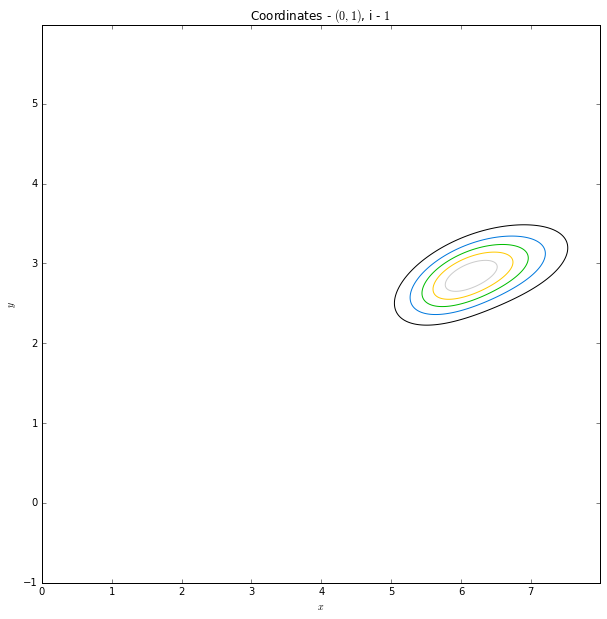

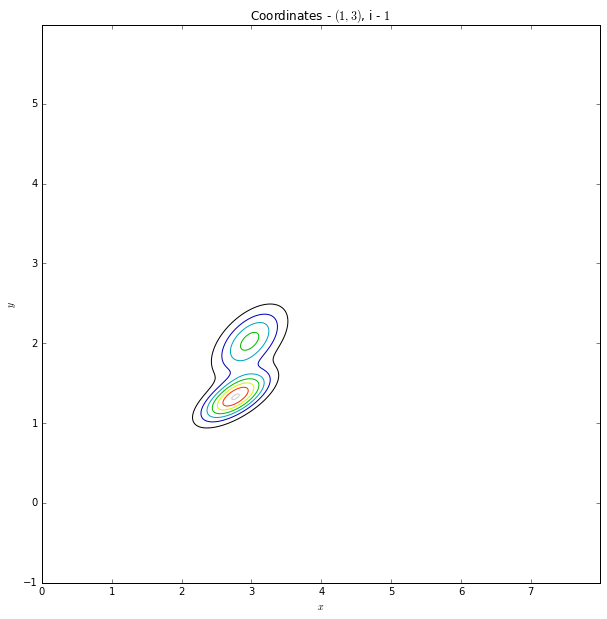

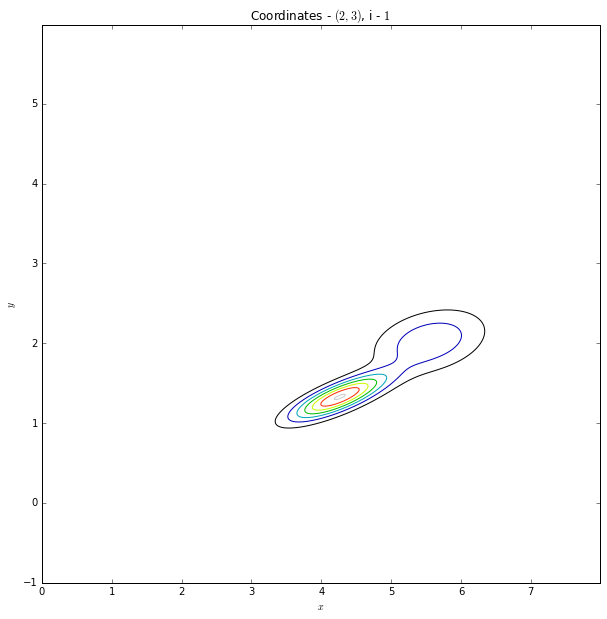

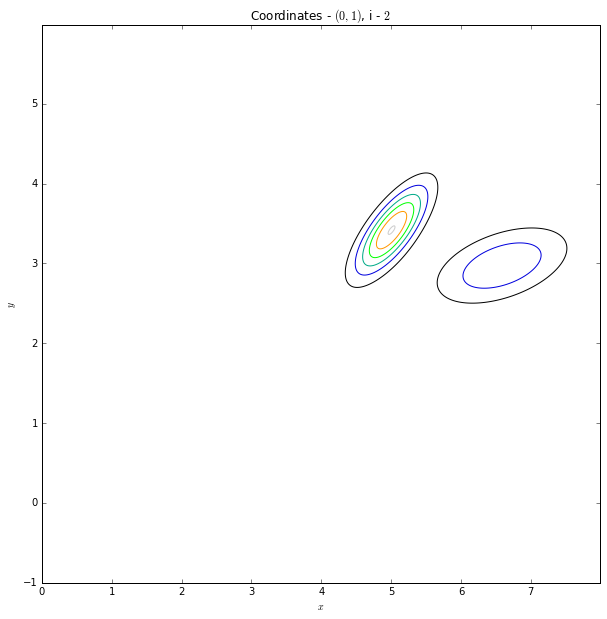

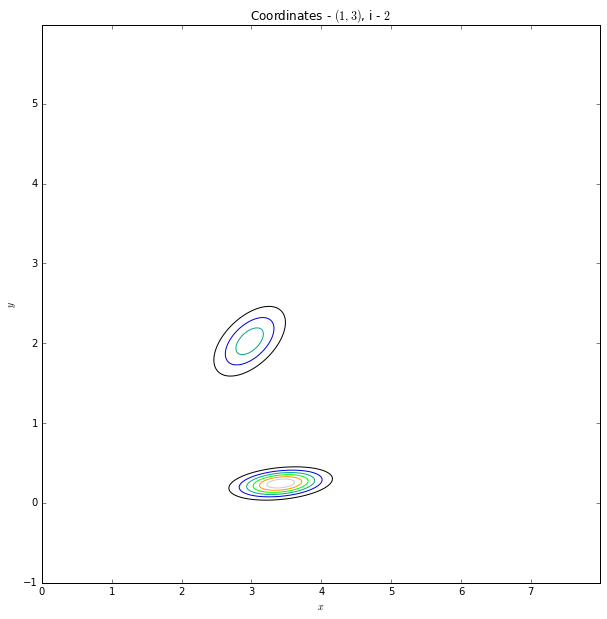

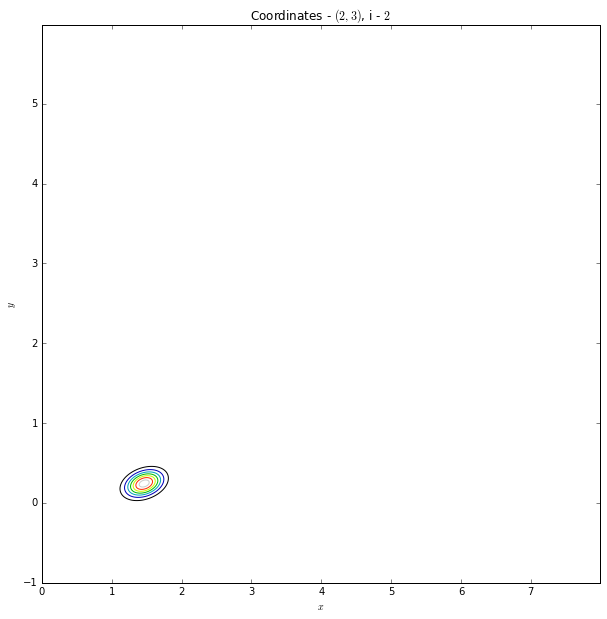

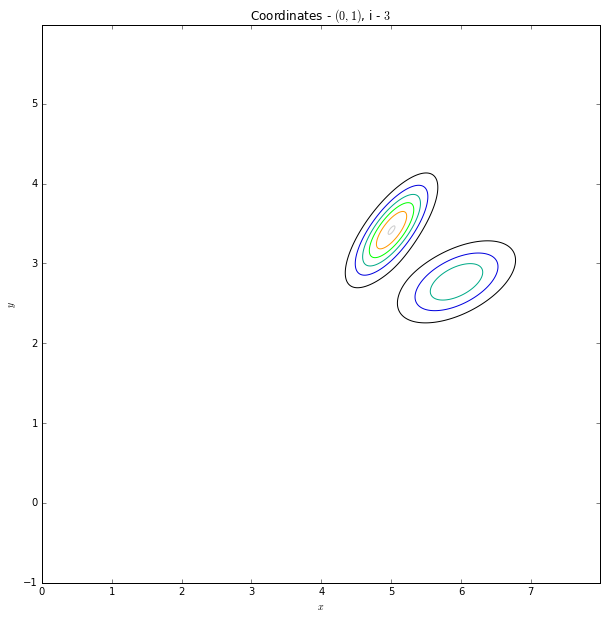

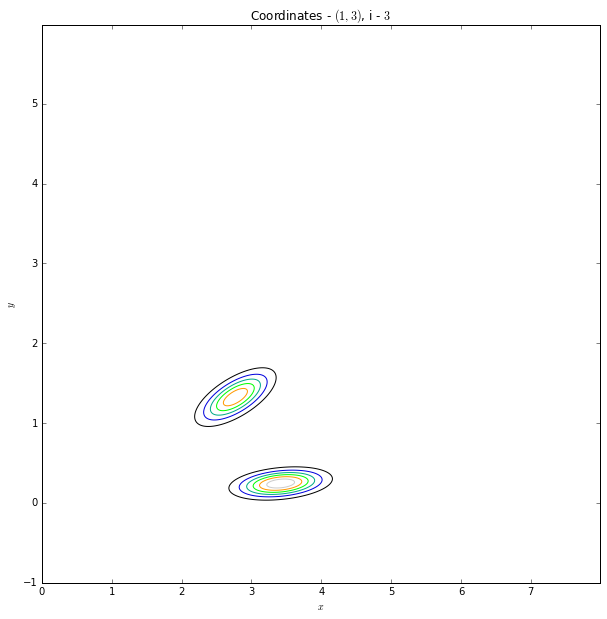

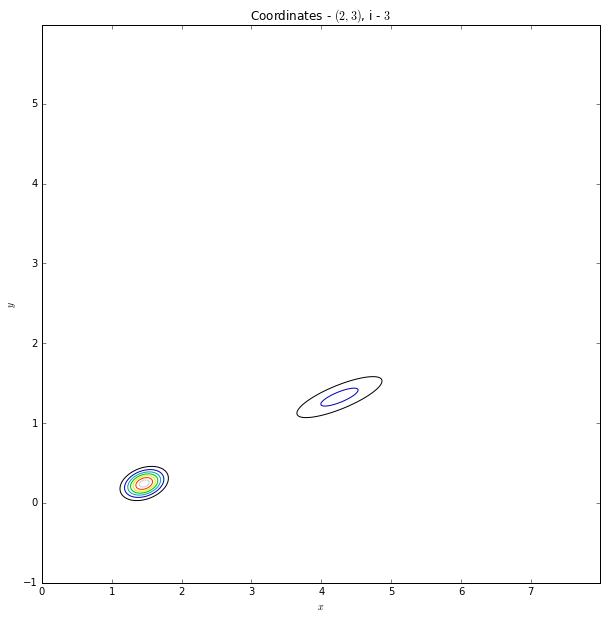

In [188]:
for i in np.arange(1,4):
    for pair in ((0,1), (1,3), (2,3)):
        print_cond_density(pair,i)